In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sys
from scipy.integrate import solve_ivp
import scipy.linalg as al

In [2]:
b = 0.5
k = 1
m = 1
Tp = 0.1
Tf = 10 #czas symulacji
samples =int(Tf/Tp + 1)
T = np.linspace(0,Tf,samples)

In [3]:
V = np.random.normal(0,1,samples) #szum wyjscia
W =np.random.normal(0,1,samples)  #szum modelowania
V

array([-0.94762494, -0.0510634 ,  0.51797431, -0.27387768, -0.41910572,
       -0.20395648,  0.39356752,  0.76555062, -2.53852571, -0.50880184,
        0.27107259, -0.22991237,  0.41978544,  0.56204257,  1.51996327,
        0.3428239 ,  1.32019985,  0.66373417,  0.79769882,  0.68344792,
        1.78413332, -0.59068109,  0.34696679, -1.35248   , -1.51448029,
       -0.40614286, -0.06864191, -1.08443571,  1.79056826, -0.2170193 ,
        1.44820142, -0.17220545, -0.10595267, -0.32956025,  0.90174126,
        1.91077535,  0.1780384 ,  0.15403109, -0.84463739,  1.06296201,
       -0.67235588,  0.73056081,  0.37146646, -0.54431863, -1.8268823 ,
       -0.555525  ,  1.24358172, -0.94335187,  1.81295503, -0.97988373,
        0.33850015, -1.36085409,  0.70932627, -0.73473339,  0.64255562,
        1.69631078,  0.29453279,  0.38199682, -0.77535255, -0.17759358,
       -0.41952479,  1.08179109, -1.36250821, -0.1444112 ,  0.2480513 ,
       -0.39251187, -0.5072532 , -0.8403857 ,  0.33397473,  1.87

In [4]:
U = np.sin(T) # wejscie
U

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

In [5]:
U2 = U + V

In [6]:
A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0],
              [1/m]])

C = np.array([[1, 0]])

D = np.array([[0]])

In [7]:
res = signal.lsim([A,B,C,D],U,T)
X = res[2]
Y = res[1]


In [8]:
Y1 = Y

for i in range(len(V)-1):
    Y1[i] = Y[i] + V[i]

Y1

array([ 1.28078954e+00,  1.07953766e+00,  5.77886154e-01, -3.90233896e-01,
       -1.15160789e+00,  3.07683727e-01,  2.67416225e-02,  4.66392918e-01,
       -1.32961548e-01,  9.50967305e-01, -1.51479457e-01, -8.97335415e-01,
        7.68108492e-01, -1.26461746e-01,  1.57187669e+00, -7.22050015e-01,
        1.11363267e-02,  5.30900660e-01, -1.02372502e-01, -5.82852228e-02,
        1.01804427e+00,  2.28439936e-01,  2.65356477e-01,  4.01165879e-01,
        1.53797273e+00,  1.41480823e+00, -2.09913407e-03,  3.51853872e-01,
        5.82367761e-01,  1.42926129e+00,  1.17200961e+00,  1.91317390e+00,
        1.63903093e-01,  1.44210443e+00,  7.26432854e-02, -9.96679762e-02,
        1.98275314e+00,  1.63575715e+00,  3.00217360e+00,  3.25604803e-01,
       -7.10092724e-01, -1.05769706e+00, -8.28494625e-02,  1.38007272e+00,
        1.23689888e+00, -5.77073038e-01,  6.36775074e-02, -2.98024900e-01,
       -2.62309600e+00, -1.13078227e+00, -1.51761527e+00, -1.48288696e+00,
       -9.91056532e-01, -

In [9]:
w0 = 15
l1 = 2*w0 - 1/2
l2 = w0**2 -w0 - 3/4
L = np.array([[l1],[l2]])
H = A - L@C

estX = np.array([[0],[0]]).T
for i in range(0,samples - 1):
    preX = np.array([estX[-1,:].T]).T
    curX = np.array([Tp*H @ estX[-1,:].T]).T + Tp*B * U[i] + Tp*L* Y[i] + preX
    estX = np.vstack([estX, curX.T])

In [10]:
estX

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 3.77832914e+00,  2.68005211e+01],
       [-1.50305360e+00, -3.13795661e+01],
       [ 1.49776206e+00,  1.39032488e+01],
       [-2.68150113e+00, -2.64184532e+01],
       [-8.10161383e-01,  7.22257752e+00],
       [ 3.20973944e+00,  3.03813163e+01],
       [-3.14197250e+00, -3.80064887e+01],
       [ 3.70205662e+00,  3.97775012e+01],
       [-3.63349686e+00, -4.27575991e+01],
       [ 5.61491251e+00,  5.57518758e+01],
       [-5.82075621e+00, -6.81748141e+01],
       [ 1.88585374e+00,  3.89277032e+01],
       [ 2.48127559e+00,  1.34971174e+01],
       [-3.86183781e+00, -4.18964139e+01],
       [ 7.97797857e+00,  7.43836114e+01],
       [-1.02487446e+01, -1.12081716e+02],
       [ 8.80973260e+00,  1.09335211e+02],
       [-4.67930056e+00, -7.01479150e+01],
       [ 1.80784571e+00,  2.96970151e+01],
       [-7.27539021e-01, -1.09227799e+01],
       [ 3.32965371e+00,  2.63133732e+01],
       [-3.18758960e+00, -4.01418381e+01],
       [ 2.

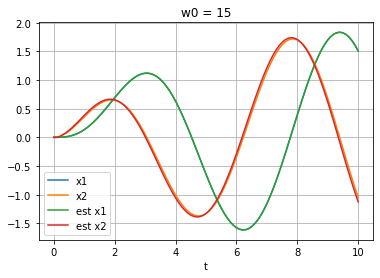

In [244]:
plt.figure()
plt.plot(T, X)
plt.plot(T,estX)
plt.title("w0 = 15")
plt.legend(["x1","x2","est x1","est x2"], loc=3)
plt.xlabel("t")
plt.grid()
plt.savefig("11.pdf")

In [55]:
eigenvalA, eigenvecA = al.eig(H)
eigenvalA

array([-4.+0.j, -4.+0.j])

In [258]:
x1 = Y
x2p = np.array([[0],[0]])
for i in range(0,samples - 2):
    x2 = (x1[i]-x1[i-1])/Tp
    x2p = np.vstack([x2p, x2.T])

TypeError: array() missing required argument 'object' (pos 1)

In [248]:
x2p[2] = -0.01207334478

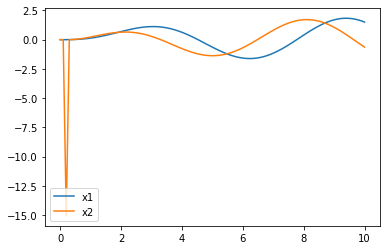

In [256]:
plt.figure()
plt.plot(T, x1)
plt.plot(T, x2p)
plt.plot(T,estX)
plt.legend(["x1","x2","est x1","est x2"], loc=3)
plt.savefig("15.pdf")